# PROBLEMA VIAJERO COLOMBIAN VERSION.

In [43]:
#Importamos las librerias Necesarias para el desarollo Utlizando Algoritmos Geneticos
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point
import pyproj
import pygad 
from matplotlib import animation, rc
import pandas as pd
import random
import itertools
import imageio
import os

Instanciamos las Ciudades y las coordenadas

In [44]:
# Coordenades X Y de las ciudades
ciudades = ["Palmira", "Pasto", "Tuluá", "Bogota", "Pereira", "Armenia", "Manizales", "Valledupar",
"Montería", "Soledad", "Cartagena", "Barranquilla", "Medellín", "Bucaramanga", "Cúcuta"]

idx_ciudades=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14]

#Las coordenadas corresponden al orden en como esta la lista de ciudades
coords=[[3.53944, -76.30361], [1.21361, -77.28111], [4.08466, -76.19536],
 [4.60971, -74.08175], [4.81333, -75.69611], [4.53389, -75.68111]
, [5.06889, -75.51738], [10.46314, -73.25322], 
[8.74798, -75.88143], [10.91843, -74.76459], 
[10.39972, -75.51444], [10.96854, -74.78132], [6.25184, -75.56359],
 [7.12539, -73.1198], [7.89391, -72.50782]]

Y = [coords[i][0] for i in range(len(coords))]
X = [coords[i][1] for i in range(len(coords))]
print(X)
print(Y)

[-76.30361, -77.28111, -76.19536, -74.08175, -75.69611, -75.68111, -75.51738, -73.25322, -75.88143, -74.76459, -75.51444, -74.78132, -75.56359, -73.1198, -72.50782]
[3.53944, 1.21361, 4.08466, 4.60971, 4.81333, 4.53389, 5.06889, 10.46314, 8.74798, 10.91843, 10.39972, 10.96854, 6.25184, 7.12539, 7.89391]


Se Realiza una conversion de loas coordenadas Anteriores para que coincidan con el formato del archvo .shp del mapa de Colombia

In [45]:
#TRANSFORMACION DE LAS COORDENAS
# Definir el sistema de proyección de origen 
source_crs = 'EPSG:4326'

# Definir el sistema de proyección de destino 
target_crs = 'EPSG:21897'
# Crear un objeto de transformación de proyección
transformer = pyproj.Transformer.from_crs(
    source_crs, target_crs, always_xy=True)
X_T, Y_T = transformer.transform(X, Y)
print(X_T)
print(Y_T)

# Crear una lista de puntos Shapely a partir de las coordenadas X e Y
geometry = [Point(x, y) for x, y in zip(X_T, Y_T)]
# Crear un GeoDataFrame con las ciudades y la geometría
df = gpd.GeoDataFrame(
    {'Ciudad': ciudades, 'geometry': geometry})

#Cambia el formato de POINT a FLOAT puesto que mas adelanto realizaremos calculos con estos
def punto_a_entero(punto):
    x, y = punto.x, punto.y
    return float(x), float(y)
#Agregamos la columna Punto_float al dataframe
df['punto_float'] = df['geometry'].apply(lambda punto: punto_a_entero(punto))
df



[752605.9915458227, 643275.0465845948, 764787.6710086607, 999529.3630757327, 820426.0323943375, 822021.5505042156, 840318.4461557847, 1090247.024864841, 801474.1002934285, 924887.5034194184, 842633.5437126327, 923071.5071483594, 835526.5527440282, 1105793.363446178, 1173108.296118954]
[883431.2205430069, 626167.8831370582, 943734.5434153986, 1001493.9629269837, 1024217.0013714742, 993300.2959815342, 1052441.7478454192, 1648963.4840482422, 1459613.1832835586, 1699295.6026588602, 1642191.7124144642, 1704843.1924954015, 1183313.114715379, 1279803.6634820616, 1365014.5786278923]


,Ciudad,geometry,punto_float
0,Palmira,POINT (752605.992 883431.221),"(752605.9915458227, 883431.2205430069)"
1,Pasto,POINT (643275.047 626167.883),"(643275.0465845948, 626167.8831370582)"
2,Tuluá,POINT (764787.671 943734.543),"(764787.6710086607, 943734.5434153986)"
3,Bogota,POINT (999529.363 1001493.963),"(999529.3630757327, 1001493.9629269837)"
4,Pereira,POINT (820426.032 1024217.001),"(820426.0323943375, 1024217.0013714742)"
5,Armenia,POINT (822021.551 993300.296),"(822021.5505042156, 993300.2959815342)"
6,Manizales,POINT (840318.446 1052441.748),"(840318.4461557847, 1052441.7478454192)"
7,Valledupar,POINT (1090247.025 1648963.484),"(1090247.024864841, 1648963.4840482422)"
8,Montería,POINT (801474.100 1459613.183),"(801474.1002934285, 1459613.1832835586)"
9,Soledad,POINT (924887.503 1699295.603),"(924887.5034194184, 1699295.6026588602)"


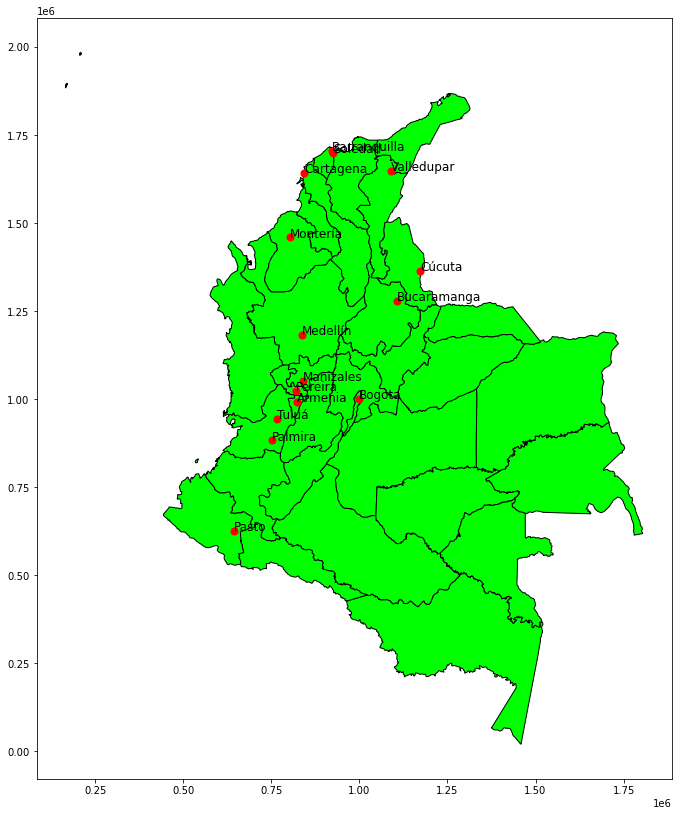

In [46]:
# Cargar el shapefile de Colombia
mapa = gpd.read_file('Colombia Shape\depto.shp')
#print(mapa.crs) #Formato CRS del archivo .shp
fig, ax = plt.subplots(figsize=(14, 14))
mapa.plot(ax=ax, color='lime', edgecolor='black')
df.plot(ax=ax, markersize=50, color='red')
for i, txt in enumerate(df['Ciudad']):
    ax.annotate(txt, (df['geometry'][i].x,df['geometry'][i].y), fontsize=12)

## Matriz De Costos.

Matrices Requeridas:
    
    MATRIZ DE DISTANCIAS ENTRE LAS CIUDADES:MDC

    MATRIZ DE # DE PEJAES ENTRE LAS CIUDADES:MNP

    MATRIZ DE TIEMPO ESTIMADO ENTRE CIUDADES:MTC

Para realizar estos calculos tambien hay que tener en cuenta la informacion del Automovil que se empleara para este problema el cual es un Chevrolet Camaro SS
Este Camaro usa Gasolina como combustible (Inserte Imagen de Camaro)

De este Auto tenemos lo siguiente:

Su rendimeinto en KM por Galon es: 29.15Km/Galon.

El precio de la gasolina a la fecha de realizacion de este trabajo (Marzo 15 del 2023) es de $9.664 Pesos Colombianos por Galon.

EL sueldo por Hora de nuestro chofer a la fecha de realizacion de este trabajo (Marzo 15 del 2023) sera de $1368,39 COP

Nuestro automovil en Colombia pagaria la tarifa de categoria 1. Este costo sera de Aproximadamente $8000 COP

### Matriz de Distancias Entre las ciudades: MDC

Para esto Usaremos la Formula de Haversine que sirve para calcular la distancia en km entre 2 puntos de la tierra el cual nos dara un estimado de las diatancias que requerimos para la solucion de este problema.

In [47]:
#FUNCION DE HAVERSINE
from math import radians, sin, cos, sqrt, atan2
def haversine(coord1, coord2):
    # Radio de la Tierra en km
    R = 6371.0

    # Convertir coordenadas de grados a radianes
    lat1, lon1 = map(radians, coord1)
    lat2, lon2 = map(radians, coord2)

    # Diferencia de latitud y longitud
    dlat = lat2 - lat1
    dlon = lon2 - lon1

    # Fórmula de Haversine
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    # Distancia entre las dos coordenadas
    distance = R * c

    return distance

In [48]:
# Creamos una matriz vacía de distancias
distances = [[0.0] * len(coords) for i in range(len(coords))]

# Calcular la distancia entre cada par de ciudades
for i in range(len(coords)):
    for j in range(i + 1, len(coords)):
        # Calcular la distancia entre las coordenadas
        dist = haversine(coords[i], coords[j])

        # Almacenar la distancia en la matriz y los redondeamos a 2 decimales
        distances[i][j] = round(dist,2)
        distances[j][i] = round(dist,2)

# Imprimir la matriz de distancias
#for i in range(len(ciudades)):
 #   print(ciudades[i], distances[i])
#convertimos la lista en una matriz 15X15
MDC = np.array(distances).reshape(15,15) 
MDC

array([[   0.  ,  280.49,   61.8 ,  273.66,  156.85,  130.36,  191.11,
         840.18,  581.04,  837.86,  767.78,  842.95,  312.55,  532.17,
         640.89],
       [ 280.49,    0.  ,  341.26,  518.46,  437.24,  409.72,  471.28,
        1120.66,  851.99, 1114.34, 1039.94, 1119.27,  591.73,  803.06,
         911.8 ],
       [  61.8 ,  341.26,    0.  ,  241.51,   98.12,   75.81,  132.76,
         779.9 ,  519.7 ,  776.06,  706.2 ,  781.14,  250.93,  479.72,
         587.92],
       [ 273.66,  518.46,  241.51,    0.  ,  180.33,  177.48,  167.06,
         657.24,  501.23,  705.52,  662.89,  711.25,  245.45,  299.28,
         404.5 ],
       [ 156.85,  437.24,   98.12,  180.33,    0.  ,   31.12,   34.63,
         683.44,  437.99,  686.56,  621.5 ,  691.8 ,  160.63,  383.75,
         491.38],
       [ 130.36,  409.72,   75.81,  177.48,   31.12,    0.  ,   62.19,
         711.52,  469.11,  717.07,  652.51,  722.33,  191.47,  404.1 ,
         512.45],
       [ 191.11,  471.28,  132.76,  167.

Ahora Procedemos a las creacion de las matrices MNP y MTC las que corresponden al numero de peajes entre ciudades y el tiempo para viajar de una ciudad a otra

In [49]:
#procedemos a convertir los archivos .xlsx a matrices 
# Cargar el archivo de Excel en un DataFrame
Peajes = pd.read_excel('PeajesSimples.xlsx',header=None)

# Convertir el DataFrame en un array de NumPy
MNP = Peajes.to_numpy()

Tiempos = pd.read_excel('TiemposSimples.xlsx', header=None) #en Total de Minutos

# Convertir el DataFrame en un array de NumPy
MTC = Tiempos.to_numpy()

print(MNP.shape)
print(MTC.shape)


(15, 15)
(15, 15)


Con estas 3 matrices ya calculadas damos luz para la matriz de costos totales de movilizacion entre ciudades la denotaremos MCTC

In [50]:
#Datos usados para los caclculos
Vh = 1368.39 # Salrio de una hora de sueldo del chofer
Cpc1 = 8000 # Costo Aproximado de los peajes (Esto puede variar mucho o poco entre peajes para la practicidad del ejercicio se fijo).
Pg = 9.664 # PRecio del Galon de Combustible

#Realizamos alguno Ajustes en las matrices 
Txh = MTC/60 # Convertimos los minutos en horas
Dxg = MDC/29.15 # Con esta operacion conseguimos el numero de kilometros por galon 

#FINALMENTE Calculamos la matriz MCTC

MCTC = Vh*Txh + MNP*8000 + Pg*Dxg 

print(MCTC.shape)


(15, 15)


## Problema del Viajero Colombian Version: Algoritmos geneticos

In [51]:
#Variables necesarias para la creacion de gif
num_imagenes = 10
imagenes = []

def tsp_fitness(solution, s_idx):
    #Realizamos unos ajustes a soltion puesto que no se encuentran en formato que nos deje iterar
    solution = solution.tolist()
    solution = [int(x) for x in solution]

    # Verificar que no haya ciudades repetidas en la solución
    if len(set(solution)) != len(solution):
        return 0  # retorna aptitud cero si hay ciudades repetidas en la solución

    # Verificar que la solución contenga todas las ciudades
    if set(solution) != set(range(len(ciudades))):
        return 0  # retorna aptitud cero si falta alguna ciudad en la solución

    # Calcular el costo total del recorrido
    distance = 0
    for i in range(len(solution)-1):
        distance += MCTC[solution[i]][solution[i+1]]
    distance += MCTC[solution[-1]][solution[0]]  # vuevle al punto de inicio

    # Retornar la inversa de la distancia como aptitud (para maximizar)
    return 1/distance

Generaciones = [100, 150, 270, 500, 1120, 1500]
mejor_soluciones = []
sol_per_pop = 15
soluciones_iniciales = [list(set(np.random.permutation(idx_ciudades)))
                        for _ in range(sol_per_pop)]
for i in range(len(Generaciones)):
    num_generations = Generaciones[i]
    # Definir el modelo de optimización genética con PyGAD
    ViajeroGA = pygad.GA(num_generations=num_generations,
                        num_parents_mating=4,
                        sol_per_pop=sol_per_pop,
                        num_genes=len(ciudades),
                        initial_population=soluciones_iniciales,
                        mutation_percent_genes=30,
                        fitness_func=tsp_fitness,
                        mutation_type="scramble",
                        init_range_low=1,
                        init_range_high=15,
                        parent_selection_type="rank")
    # Ejecutar la optimización genética
    ViajeroGA.run()

    # Obtener la mejor solución encontrada
    solution, solution_fitness, solution_idx = ViajeroGA.best_solution()
    solution_indices = [int(x) for x in solution.tolist()]
    mejor_soluciones.append(solution_indices)
    MejorCiudades = []
    for i in solution_indices:
        MejorCiudades.append(ciudades[i])

    # Imprimir la mejor solución encontrada
    print("Mejor solución encontrada en:",
          num_generations, "iteraciones es:", MejorCiudades)

    


Mejor solución encontrada en: 100 iteraciones es: ['Medellín', 'Pereira', 'Tuluá', 'Pasto', 'Palmira', 'Bogota', 'Armenia', 'Manizales', 'Bucaramanga', 'Cúcuta', 'Valledupar', 'Soledad', 'Cartagena', 'Barranquilla', 'Montería']
Mejor solución encontrada en: 150 iteraciones es: ['Bogota', 'Manizales', 'Armenia', 'Pasto', 'Palmira', 'Tuluá', 'Pereira', 'Medellín', 'Montería', 'Valledupar', 'Barranquilla', 'Soledad', 'Cartagena', 'Cúcuta', 'Bucaramanga']
Mejor solución encontrada en: 270 iteraciones es: ['Pereira', 'Armenia', 'Tuluá', 'Pasto', 'Palmira', 'Manizales', 'Medellín', 'Bogota', 'Valledupar', 'Cartagena', 'Barranquilla', 'Soledad', 'Montería', 'Cúcuta', 'Bucaramanga']
Mejor solución encontrada en: 500 iteraciones es: ['Tuluá', 'Palmira', 'Pasto', 'Manizales', 'Bucaramanga', 'Montería', 'Barranquilla', 'Cartagena', 'Soledad', 'Valledupar', 'Cúcuta', 'Bogota', 'Medellín', 'Pereira', 'Armenia']
Mejor solución encontrada en: 1120 iteraciones es: ['Pereira', 'Tuluá', 'Pasto', 'Palmir

Calculamos el costo total del recorrido

In [52]:
def costo_total(ruta, costos):
    costo = 0
    for i in range(len(ruta) - 1):
        costo += MCTC[ruta[i]][ruta[i+1]]
    return costo

for i in range(len(mejor_soluciones)):
    print("El costo total de la ruta es: $",round(costo_total(mejor_soluciones[i],MCTC),2)," COP para un total de ", Generaciones[i], "Iteraciones")


El costo total de la ruta es: $ 674823.84  COP para un total de  100 Iteraciones
El costo total de la ruta es: $ 637997.55  COP para un total de  150 Iteraciones
El costo total de la ruta es: $ 662471.93  COP para un total de  270 Iteraciones
El costo total de la ruta es: $ 739412.33  COP para un total de  500 Iteraciones
El costo total de la ruta es: $ 657706.6  COP para un total de  1120 Iteraciones
El costo total de la ruta es: $ 640650.87  COP para un total de  1500 Iteraciones


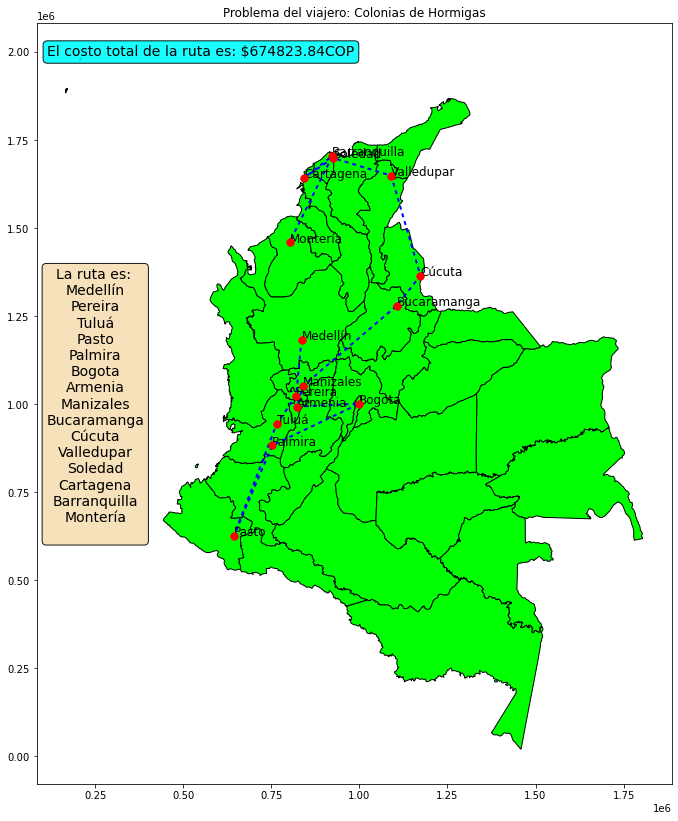

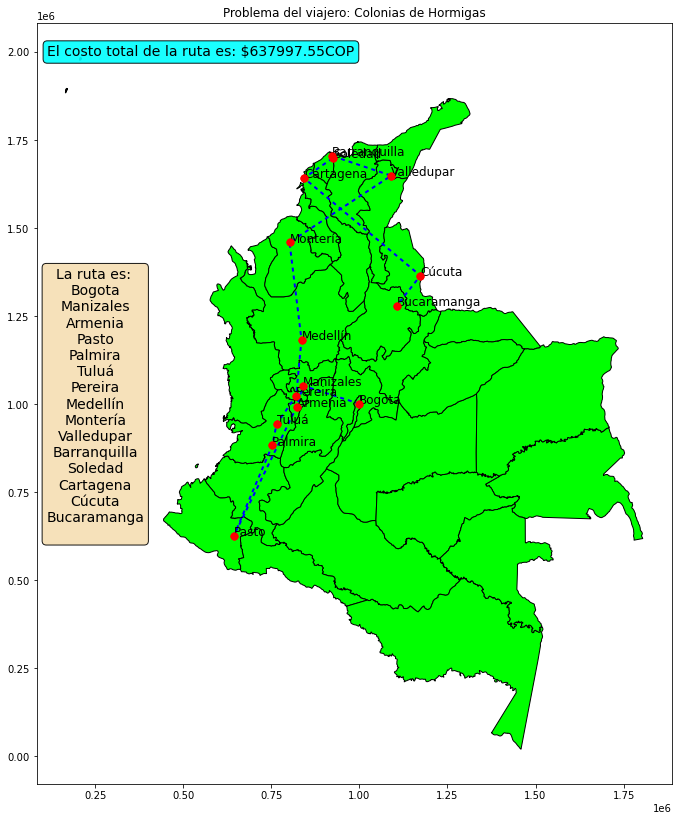

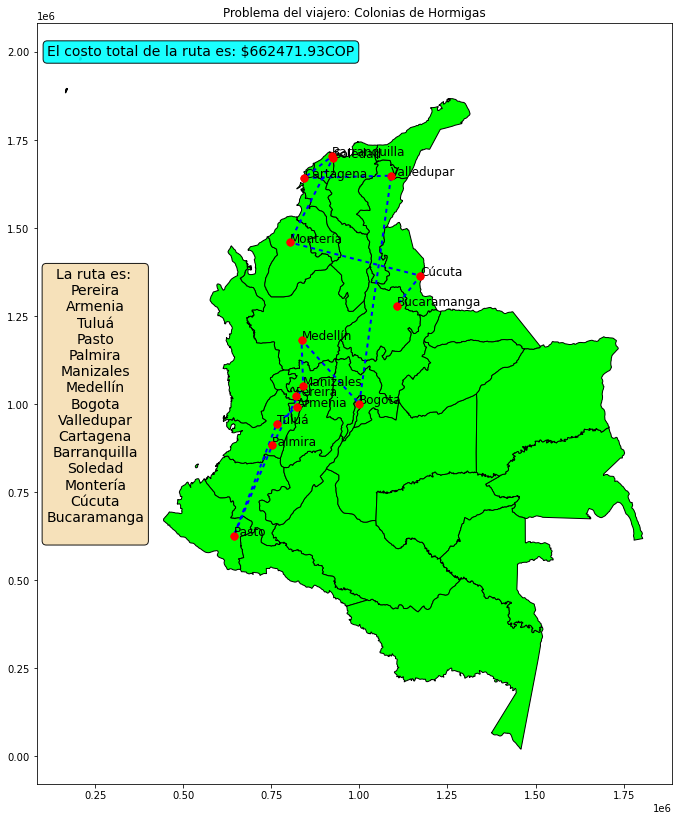

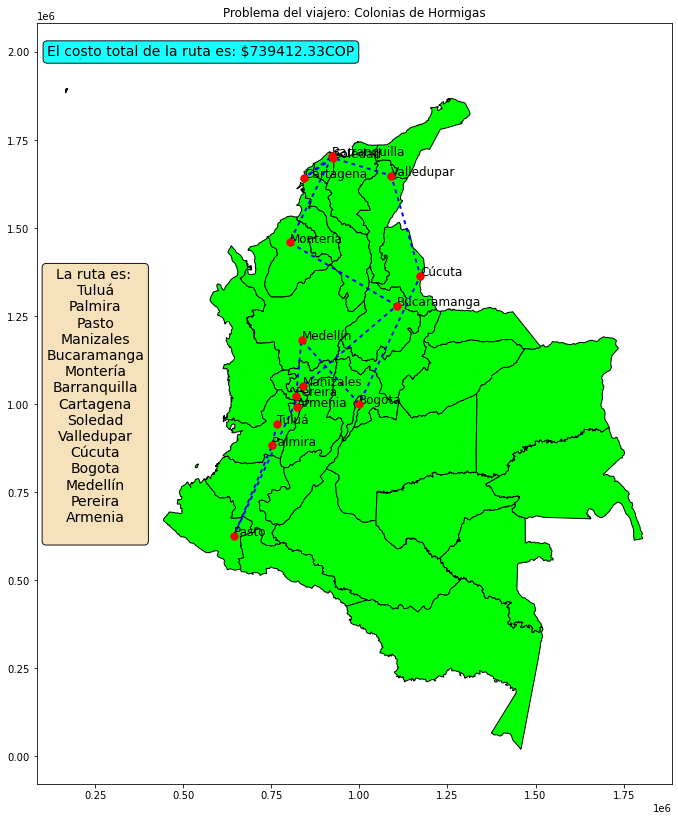

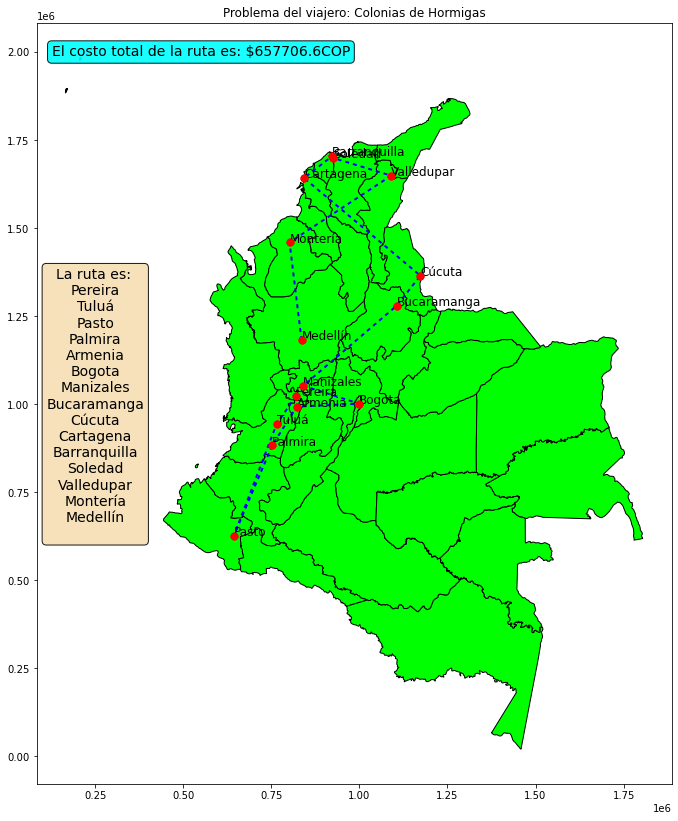

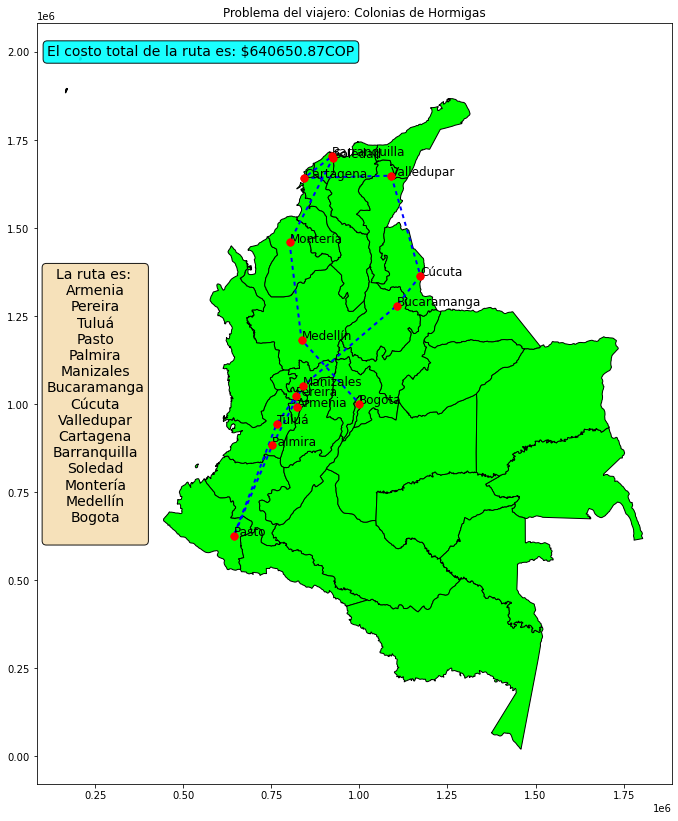

In [53]:
#Cada vez que ejecutemos esta celda y el script en general borramos los archivos para que no se acumulen plot de otras seseiones
folder_path = "GifVGA"
for file_name in os.listdir(folder_path):
    file_path = os.path.join(folder_path, file_name)
    if os.path.isfile(file_path):
        os.remove(file_path)
# Lista para almacenar las rutas de las rutas de las imágenes PNG
ruta_imagenes = []

for i in range(len(mejor_soluciones)):
    texto = "La ruta es: "+"\n" # texto inical para añadir las rutas al plot
    texto2 = "El costo total de la ruta es: $"+str(round(costo_total(mejor_soluciones[i], MCTC), 2))+"COP" #Texto para añadir el valor de la ruta

    current_sol = mejor_soluciones[i] #Obtenbemos la soulcion por iteracion
    for j in range(len(current_sol)):
        texto += str(ciudades[current_sol[j]])+"\n"

    rutacol = [df.iloc[i]['geometry']for i in mejor_soluciones[i]] #Aqui obtenemos la ruta segun sea la solucion
    #creamos el plot de la ruta
    fig, ax = plt.subplots(figsize=(14, 14))
    mapa.plot(ax=ax, color='lime', edgecolor='black')
    df.plot(ax=ax, markersize=50, color='red')
    for i, txt in enumerate(df['Ciudad']):
        ax.annotate(txt, (df['geometry'][i].x,
                    df['geometry'][i].y), fontsize=12)
    df.plot(ax=plt.gca(), color='red', markersize=50, zorder=3)
    plt.plot([p.x for p in rutacol], [p.y for p in rutacol],
             color='blue', linestyle='--', linewidth=2, dashes=[2, 2], zorder=2)
    plt.text(250000, 1000000, texto, ha='center', va='center', size=14,
             bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.9))
    plt.text(550000, 2000000, texto2, ha='center', va='center', size=14,
             bbox=dict(boxstyle='round', facecolor='cyan', alpha=0.9))
    plt.title("Problema del viajero: Colonias de Hormigas")

    # Generar un nombre de archivo único con un número aleatorio
    nombre_archivo = f"GifVGA/imagen_{i}_{random.randint(0, 100000)}.png"
    texto=""
    # Agregar la ruta de la imagen PNG a la lista
    ruta_imagenes.append(nombre_archivo)

    # Guardar la figura como imagen PNG
    plt.savefig(nombre_archivo)

# Crear archivo GIF a partir de las imágenes PNG
with imageio.get_writer('GifVGA/animacionGA.gif', mode='I', duration=0.8) as writer:
    for ruta in ruta_imagenes:
        image = imageio.imread(ruta)
        writer.append_data(image)
